In [1]:
import random   as rnd
import pandas   as pd
import numpy    as np

import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn                  import preprocessing
from sklearn.preprocessing    import PolynomialFeatures
from sklearn.ensemble         import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model     import LinearRegression,LogisticRegression, Lasso, Ridge
from sklearn.model_selection  import KFold, GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.svm              import SVR
from sklearn.metrics          import mean_squared_error
from sklearn.datasets         import make_classification
import seaborn as sns

import import_ipynb
import Preprocessing as pr

### Load and preprocess

In [2]:
housing = pd.read_csv('housing.csv')

#X_h means X holdout aka validation
#when the dataframe argument is true the function will 
#return all the values in a df format otherwise it will return an array
X, y, X_h, y_h = pr.preprocess(housing, normalized = True, encoded = False, dataframe = False)

#dataframe format
X_d, y_d, X_h_d, y_h_d = pr.preprocess(housing, normalized = True, encoded = False, dataframe = True)

#logistic regression does not allows to have float as values in the features so we encode the values
X_e, y_e, X_h_enc, y_h_enc = pr.preprocess(housing, normalized = True, encoded = True, dataframe = False)

In [3]:
def plot(data, predictions, name):
    index = [i for i in range(0,1000)]
    plt.figure(figsize=(20,10))
    plt.scatter(index,data, color='black', label='data')
    plt.plot(predictions, color='skyblue', label=name)
    plt.xlabel('House')
    plt.ylabel('Price')
    plt.title('California housing')
    plt.legend()
    plt.show()

In [4]:
def apply_model(model, X, y, X_h, y_h):
    
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        fit = model.fit(X_train, y_train)
        #print('Training error: ' + str(model.score(X_train, y_train)))
        print('Testing error: ' + str(model.score(X_test, y_test)))
    
    #model.fit(X, y)
    print ('Testing error on validation set: ' + str(model.score(X_h, y_h)))
    predictions = model.predict(X_h)
    mse = mean_squared_error(predictions, y_h)
    rmse = np.sqrt(mse)
    print("Mean squared error: " +str(rmse))

    return predictions


### Linear Rregression

In [5]:
def lin_reg(X, y, X_h, y_h):
    
    lin_reg = LinearRegression()
    predictions = apply_model(lin_reg, X, y, X_h, y_h)

    return predictions


Testing error: 0.594489873558687
Testing error: 0.5792879834943173
Testing error: 0.5955336657216302
Testing error: 0.587511371113949
Testing error: 0.5647248773740179
Testing error on validation set: 0.5814926414486201
Mean squared error: 0.13158470448096327


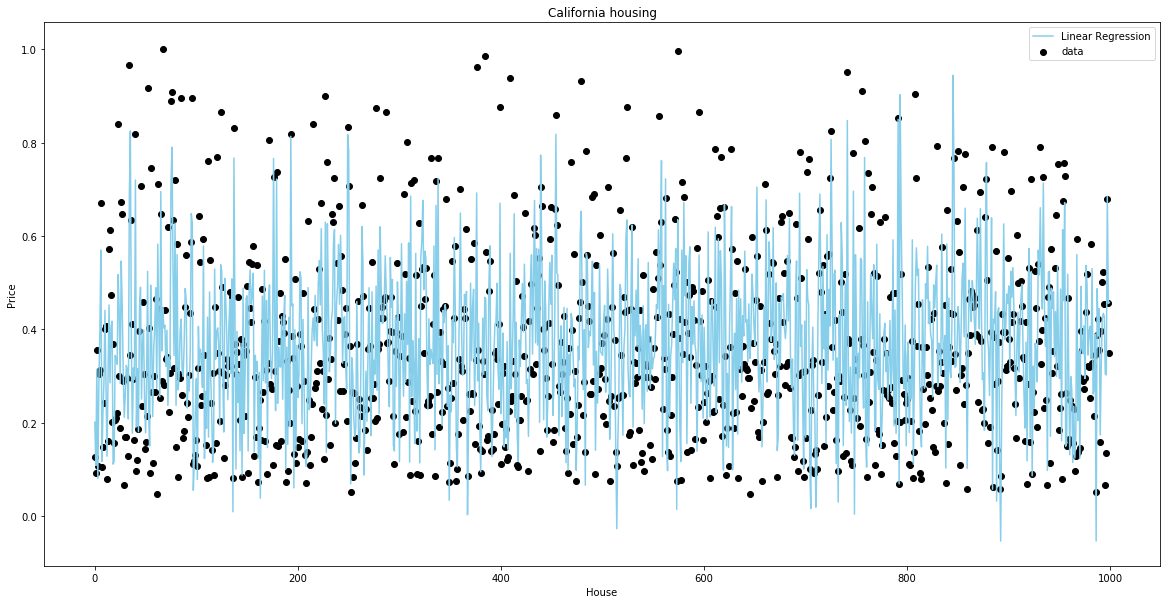

In [6]:
lin_reg_ = lin_reg(X, y, X_h, y_h)
plot(y_h, lin_reg_, "Linear Regression")

### Polynomial regression

In [24]:
def poly_reg(X,y, X_h, y_h):
    
    poly = PolynomialFeatures(degree=2)
    
    poly_reg = LinearRegression()
    
    return apply_model(poly_reg, poly.fit_transform(X), y, poly.fit_transform(X_h), y_h)


Testing error: -420276346636083.4
Testing error: 0.16089287880576508
Testing error: -27067796007555.434
Testing error: 0.5575764485655388
Testing error: -69793338065092.99
Testing error on validation set: -9.20354960082738e+17
Mean squared error: 195133367.21555263


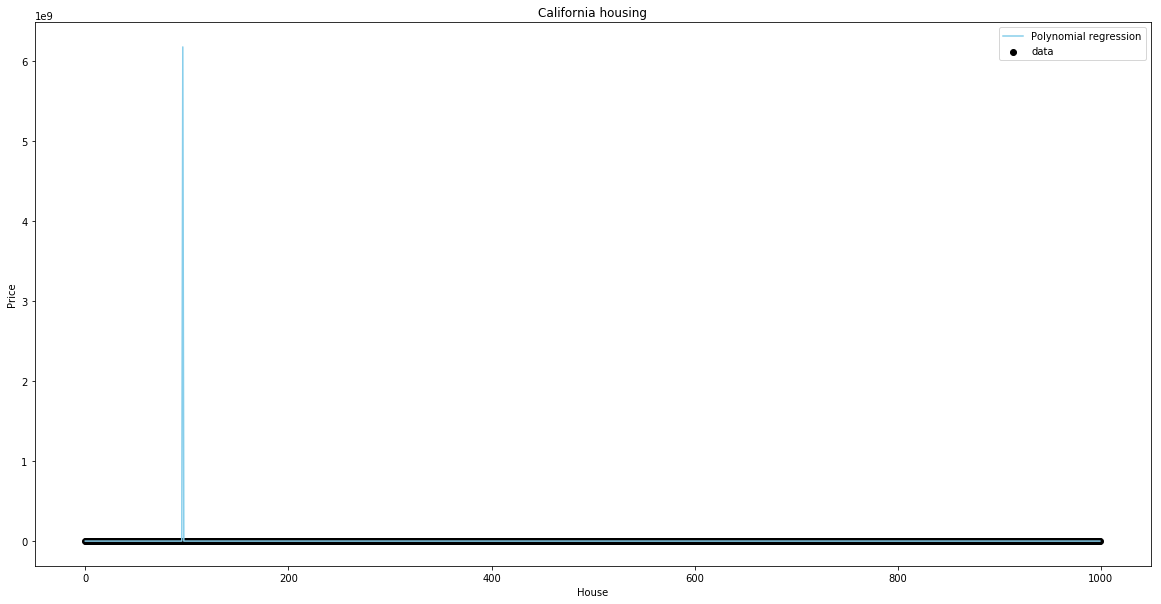

In [25]:
poly_reg_ = poly_reg(X, y, X_h, y_h)
plot(y_h, poly_reg_, "Polynomial regression")

### Ridge

In [11]:
def ridge(X, y, X_h, y_h):

    l = Ridge()
    
    return apply_model(l, X, y, X_h, y_h)

Testing error: 0.5862116435083158
Testing error: 0.5767981779768054
Testing error: 0.5806982491998705
Testing error: 0.5875993195517456
Testing error: 0.5898726056390139
Testing error on validation set: 0.5804707997546279
Mean squared error: 0.13174524737212417


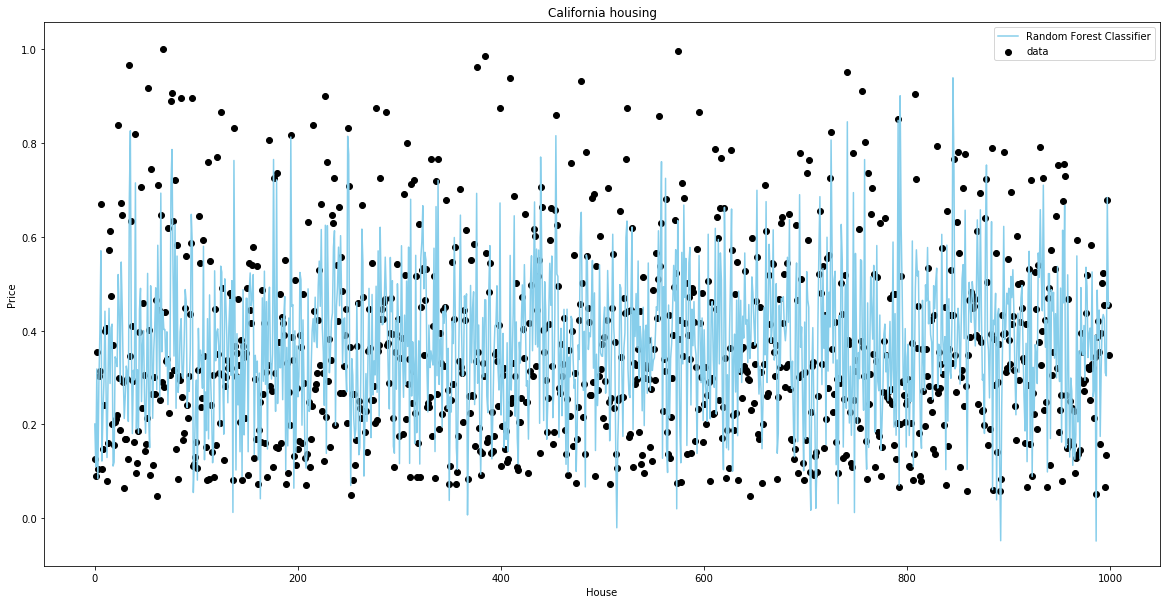

In [12]:
ridge_ = ridge(X, y, X_h, y_h)
plot(y_h, ridge_, "Random Forest Classifier")

### SVM

In [21]:
def SVM(X, y, X_h, y_h):
    

    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

    # use this to do k_fold testing, it takes a lot of time tho
    return apply_model(svr_rbf, X, np.ravel(y), X_h, np.ravel(y_h))

    '''    svr_rbf.fit(X,y)
    
    print ('Testing error on validation set: ' + str(svr_rbf.score(X_h, y_h)))
    predictions = svr_rbf.predict(X_h)
    mse = mean_squared_error(predictions, y_h)
    rmse = np.sqrt(mse)
    print("Mean squared error: " +str(rmse))   
    return predictions'''
    


Testing error: 0.6710204630033743
Testing error: 0.701330141523365
Testing error: 0.6474433877382986
Testing error: -0.016019353957385407
Testing error: 0.6560864063838975
Testing error on validation set: 0.6741368815080984
Mean squared error: 0.11611049187961793


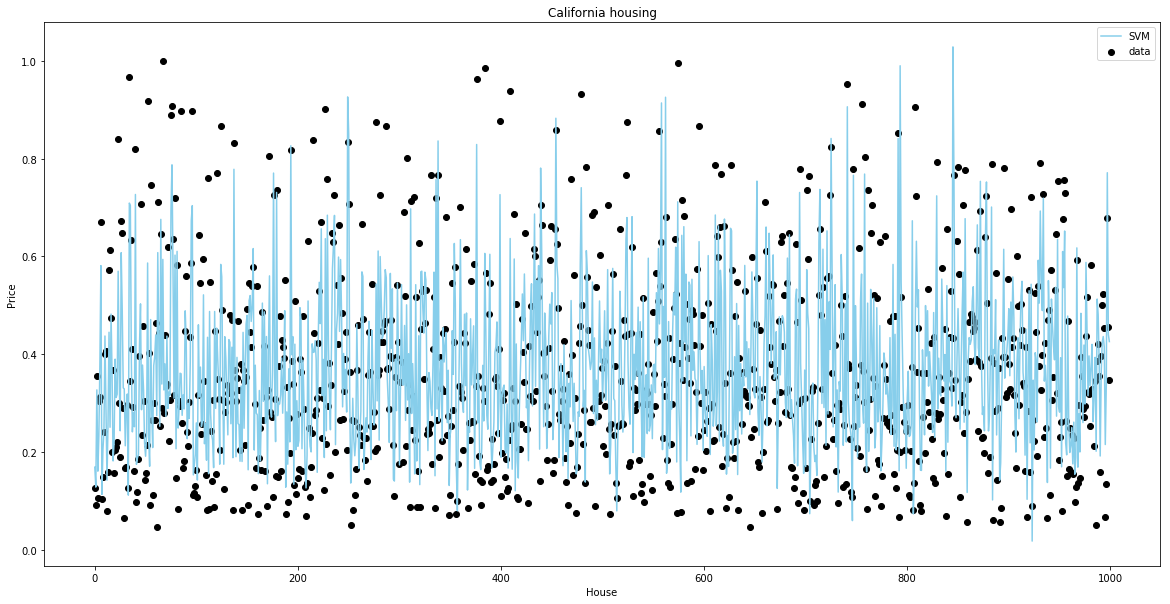

In [22]:
svm_ = SVM(X, y, X_h, y_h)
plot(y_h, svm_, "SVM")

### Random Forest Regressor

In [20]:
def random_regressor(X, y, X_h, y_h, plt):
    rg=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=70,
               max_features='sqrt', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=-1,
               oob_score=False, verbose=0, warm_start=False)
    predictions = apply_model(rg, X, np.ravel(y), X_h, np.ravel(y_h))
    
    if(plt):
        sns.barplot(data={'importance':rg.feature_importances_,'feature':X_d.columns.values},y='feature',x='importance')
    
    return predictions

Testing error: 0.8171380194211959
Testing error: 0.8080417196974169
Testing error: 0.8080669066742334
Testing error: 0.8015184298104595
Testing error: 0.8146882978244989
Testing error on validation set: 0.8434648224512569
Mean squared error: 0.07842557801926411


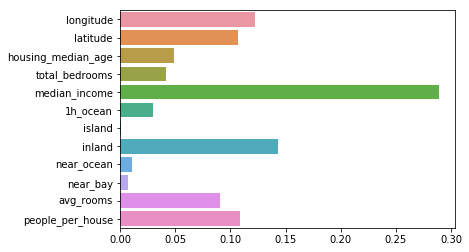

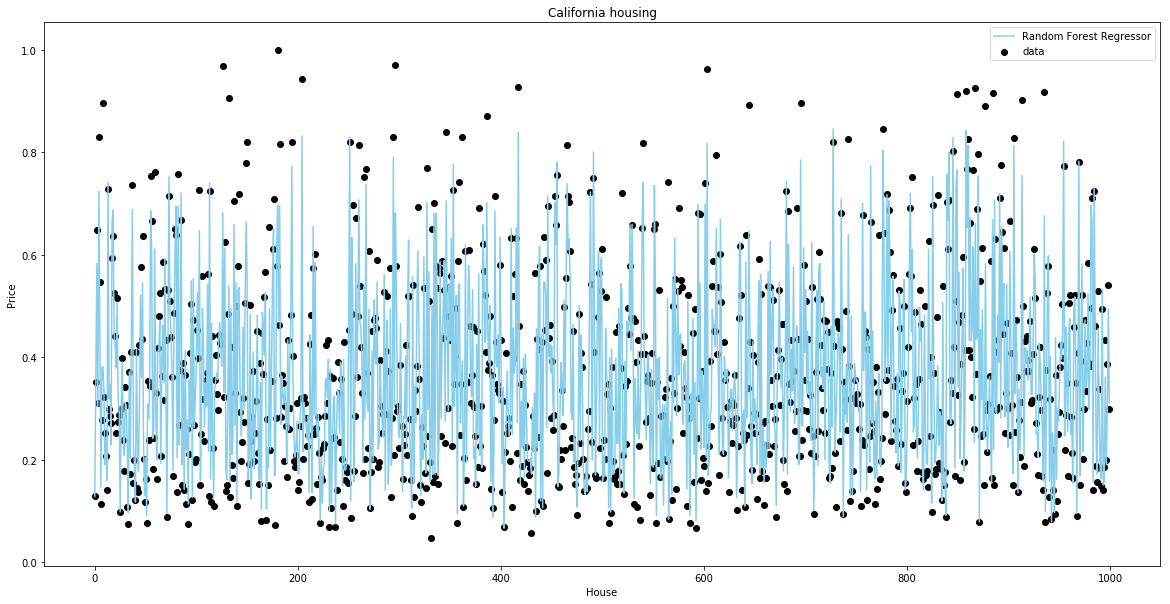

In [21]:
random_regressor_ = random_regressor(X, y, X_h, y_h, True)
plot(y_h, random_regressor_, "Random Forest Regressor")

### Random Forest Regressor with Best Features

Testing error: 0.7896421214864474
Testing error: 0.7836515090406879
Testing error: 0.8011759914569428
Testing error: 0.7916531058856018
Testing error: 0.7969091456720891
Testing error on validation set: 0.8310316594327607
Mean squared error: 0.08148063832220152


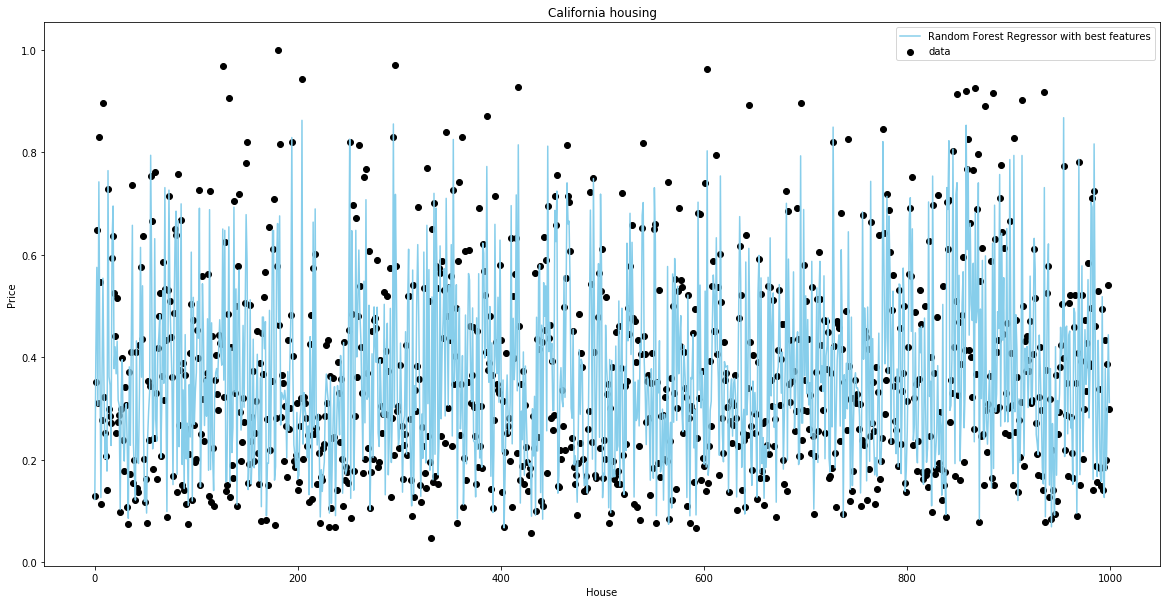

In [22]:
random_regressor_bf = random_regressor(X[:,[0,1,4,7,10,11]], y, X_h[:,[0,1,4,7,10,11]], y_h,False)
plot(y_h, random_regressor_bf, "Random Forest Regressor with best features")

### Gradient Boosting

In [16]:
def gradientboosting_regressor(X, y, X_h, y_h, plt):
    rg = GradientBoostingRegressor(learning_rate=0.05, subsample=0.5, max_depth=20, n_estimators=50)
    predictions = apply_model(rg, X, np.ravel(y), X_h, np.ravel(y_h))

    if(plt):
        sns.barplot(data={'importance':rg.feature_importances_,'feature':X_d.columns.values},y='feature',x='importance')
    
    return predictions

Testing error: 0.7921320331140859
Testing error: 0.7809722748614991
Testing error: 0.7836076285902781
Testing error: 0.7745634669872223
Testing error: 0.7942989504071986
Testing error on validation set: 0.7967632437558634
Mean squared error: 0.09169697048805994


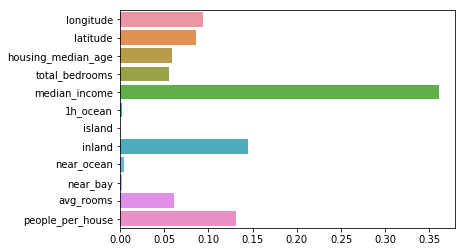

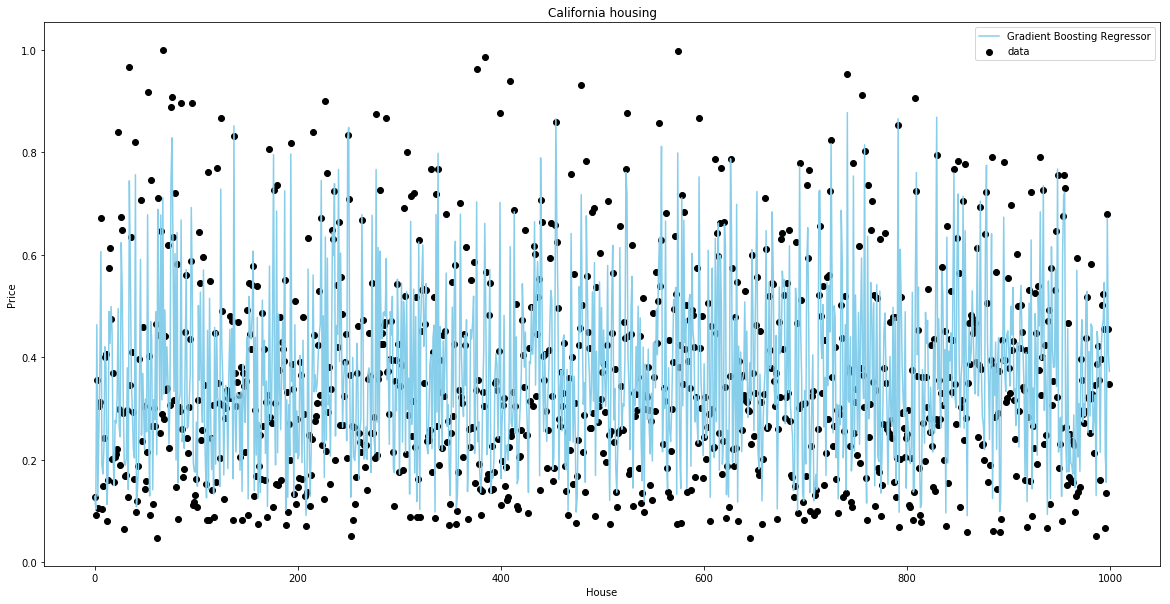

In [17]:
gb_regressor = gradientboosting_regressor(X, y, X_h, y_h, True)
plot(y_h, gb_regressor, "Gradient Boosting Regressor")

### Gradient Boosting with best features

Testing error: 0.793939678422814
Testing error: 0.7860870103791777
Testing error: 0.7886447286265539
Testing error: 0.7904491097117925
Testing error: 0.7756568465624882
Testing error on validation set: 0.7845302866390985
Mean squared error: 0.09441629998051322


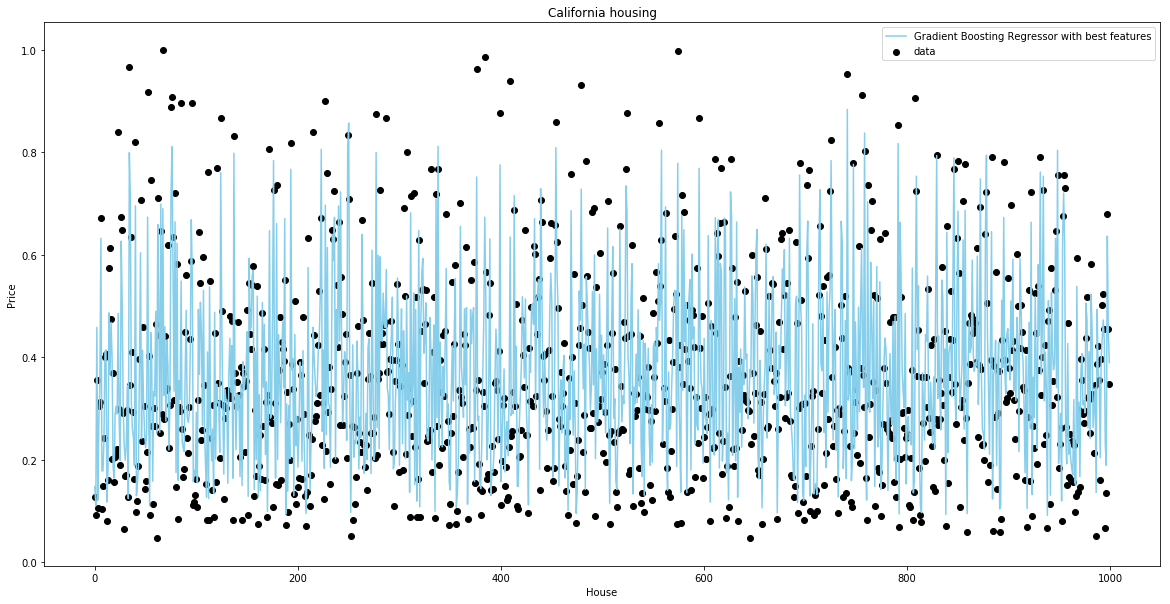

In [18]:
gb_regressor_bf = gradientboosting_regressor(X[:,[0,1,2,3,4,7,10,11]], y, X_h[:,[0,1,2,3,4,7,10,11]], y_h,False)
plot(y_h, gb_regressor_bf, "Gradient Boosting Regressor with best features")

### Two-step method

In [30]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt
from itertools import cycle
from math import sqrt

In [24]:
def plotMS(ms, C, X, y):
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    print("Estimated clusters : %d" % n_clusters_)
    
    plt.figure(1)
    plt.clf()
    
    C = C.values

    colors = cycle('bgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        b = labels == k
        cluster_center = cluster_centers[k]
        plt.plot(C[b, 0], C[b, 1], col + '.')
        """plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)"""
    plt.title('Model chaining: clustering over geographical location: %d clusters' % n_clusters_)
    plt.show()

def trainWithMS(X, C, X_d, y, bandwidth = 0.05):
    #bandwidth = estimate_bandwidth(X, quantile=0.25, n_samples=1000)
    print("Bandwidth: " + str(bandwidth))
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
    ms.fit(C)
    return ms

def makeModels(ms, X, y, m_base = lambda: LinearRegression()):
    models = []
    for k in list(set(ms.labels_)):
        model = m_base()
        kk = ms.labels_ == k
        model.fit(X[kk], y[kk])
        models.append(model)
    return models


In [25]:
def testMS(ms, models, C_h, X_h, y_h):
    values = zip(ms.predict(C_h), X_h, y_h)
    #predict which model is best for the data point, then use it to predict the final value
    predictions = []
    for (k,x,y) in values:
        predictions.append(models[k].predict(x.reshape(1, -1))[0])
        
    """
    #this is the cluster-distance-based weighted average multi model prediction
    values = zip(ms.predict(C_h), X_h, y_h, C_h.values)
    cs = list(ms.cluster_centers_)
    
    sqr = lambda x: x*x
    def dist(a,b):
        (x,y) = a
        (xx,yy) = b
        return sqrt(sqr(x-xx) + sqr(y-yy))
    
    predictions = []
    for (k,x,y,c) in values:
        pred = 0
        w_t = 0
        for kk in range(1,len(cs)):
            w = 1.0 / (0.5 + dist(cs[kk], c))
            if w > 0.5:
                p = (models[kk].predict(x.reshape(1, -1))[0])
                pred += p * w
                w_t += w
        pred /= w_t
        
        print("P: " + str(w_t))
        print()
        
        predictions.append(pred)
    """ 
        
    r2c = r2(y_h, predictions)
    print("\tScore (R2 correlation): " + str(r2c))

    mse = mean_squared_error(predictions, y_h)
    rmse = np.sqrt(mse)
    print("\tRMS error: " +str(rmse))

In [26]:
X,y,X_h,y_h = pr.preprocess(housing, True, False,True)
cols = ['longitude','latitude','housing_median_age','total_bedrooms','median_income','1h_ocean','island','inland','near_ocean','near_bay','avg_rooms','people_per_house']
msc = [ cols[c] for c in [0,1]]
oth = [ c for c in cols if c not in msc ]

C = X.drop(oth, axis=1)#X[:,:2]  
C_h = X_h.drop(oth, axis=1)  
X_d = X.drop(msc, axis=1)

Bandwidth: 0.05
number of estimated clusters : 34


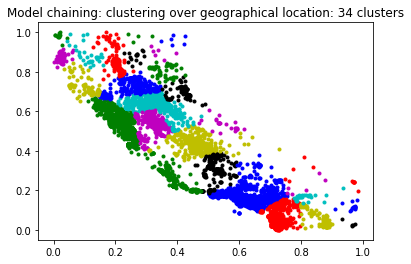

In [33]:
ms = trainWithMS(X, C, X_d, y, bandwidth = 0.05)
plotMS(ms, C, X, y)

In [34]:
make_SVM = lambda: SVR(kernel='poly', C=1e2, gamma='scale')
make_LRG = lambda: LinearRegression()
make_RFR = lambda: RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=70,
               max_features='sqrt', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=-1,
               oob_score=False, verbose=0, warm_start=False)

models = makeModels(ms, X, y, make_RFR)
print("Validation: ")
testMS(ms, models, C_h, X_h.values, y_h)

Validation: 
	Score (R2 correlation): 0.8349683438897961
	Mean squared error: 0.08112859204637088
